In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'/home/kyle/GWA/NANOGrav/PsrSigSim/')
import psrsigsim as PSS
import numpy as np

In [2]:
#Bokeh imports
from bokeh.io import curdoc, output_file, show, output_notebook
from bokeh.layouts import column, row, widgetbox
from bokeh.models import ColumnDataSource, Range1d, LinearColorMapper
import bokeh.models.widgets as widgets
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [259]:
#Default values for psr_dict----------------------------------------------------
psr_dict = {}
psr_dict['f0'] = 1150                   #Central frequency
psr_dict['F0'] = 218                    #Pulsar spin freq
psr_dict['bw'] = 1700                    #Bandwidth
psr_dict['Nf'] = 34                    #Frequency bins
psr_dict['ObsTime'] = 20                #Observation time
psr_dict['f_samp'] = .4                  #Sampling frequency
psr_dict['SignalType'] = "intensity"    #'intensity' which carries a Nf x Nt
#filterbank of pulses or 'voltage' which carries a 4 x Nt array of
#voltage vs. time pulses representing 4 stokes channels
psr_dict['dm'] = 0.00001                      #Dispersion Measure Pescs/(CM^3)
# V_ISS -- Intersteller Scintilation Velocity
#psr_dict['scint_bw'] =  15.6            #Scintilation Bandwidth
psr_dict['tau_scatter'] =0.005       #Scattering Timescale
# pulsar -- pulsar name
# telescope -- telescope name(GBT or Arecibo)
psr_dict['freq_band'] = 1400            #Frequency band [327 ,430, 820, 1400, 2300]
# aperature -- aperature (m)
# area -- collecting area (m^2)
# Tsys -- system temp (K), total of receiver, sky, spillover, etc. (only needed for noise)
# name -- GBT or Arecibo
# tau_scatter -- scattering time (ms)
psr_dict['radiometer_noise'] =  True   #radiometer noise
psr_dict['data_type']='float32'         #Was int8
psr_dict['flux'] = 80
psr_dict['to_DM_Broaden'] = False
psr_dict['to_Scatter_Broaden_exp'] = True


#Constants for generating data--------------------------------------------------
dm_range = (0,10)
dm_range_spacing = 1
NumPulses = 1
startingPeriod = 0
start_time = (startingPeriod / psr_dict['F0']) *1000  #Getting start time in ms
TimeBinSize = (1.0/psr_dict['f_samp']) * 0.001
start_bin = int((start_time)/TimeBinSize)
stop_time = (((1 / psr_dict['F0']) *1000) * NumPulses) + start_time
# start_time + however many pulses times the pulsar period in ms
stop_bin =int((stop_time)/TimeBinSize)
first_freq = psr_dict['f0']-(psr_dict['bw']/2)
last_freq = psr_dict['f0']+(psr_dict['bw']/2)
FullData = None

In [260]:
psr = PSS.Simulation(psr =  None , sim_telescope= 'GBT',
                             sim_ism= None, sim_scint= None,
                             sim_dict = psr_dict)

In [261]:
psr.init_signal()
psr.init_pulsar()
psr.init_ism()
psr.pulsar.gauss_template(peak=.25)
psr.init_telescope()

In [262]:
psr.simulate()

79% dispersed in 0.149 seconds.

/home/kyle/anaconda3/lib/python3.5/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


100% dispersed in 0.182 seconds.

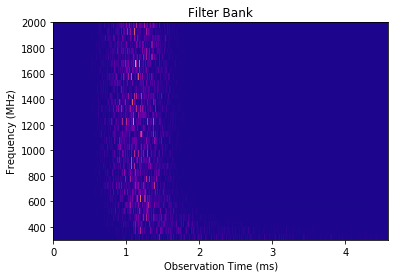

In [263]:
psr.signal.filter_bank()

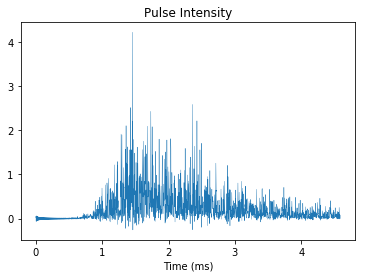

In [264]:
psr.signal.pulse_plot()

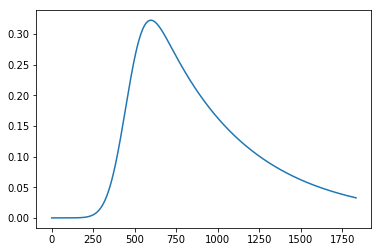

1835


In [236]:
plt.plot(psr.pulsar.profile[0,:])
plt.show()
print(psr.pulsar.profile.shape[1])


In [237]:
fig = figure(plot_width = 400, plot_height = 400)
fig.line(x = np.linspace(0,1,psr.pulsar.profile.shape[1]), y = psr.pulsar.profile[0,:])
show(fig)

In [238]:
x = 1957.5
print(int((x-342.5)/85))

19


In [242]:
src1 = ColumnDataSource(dict(x = np.linspace(0,1,psr.pulsar.profile.shape[1]), 
                             y = psr.pulsar.profile[0,:] ) )

fig1 = figure(plot_width = 400, plot_height = 400, 
              #x_range = Range1d(start_time,stop_time), 
              y_range = Range1d(0,1),
              x_axis_label = 'Observation Time (ms)',
              y_axis_label = 'Pulse Intensity',)

fig1.line(source = src1, x='x', y='y',)

show(fig1)

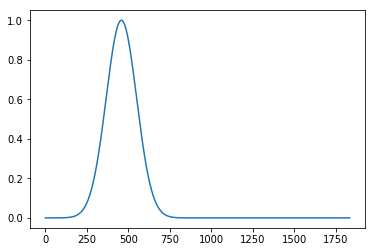

In [243]:
plt.plot(psr.pulsar.profile[-1,:])
plt.show()

In [244]:
psr.obs_signal.shape

(34, 8002)

In [245]:
import matplotlib.pyplot as plt
% matplotlib inline

In [253]:
psr.pulsar.gauss_template(peak=.5)
psr.simulate()

76% dispersed in 0.155 seconds.

/home/kyle/anaconda3/lib/python3.5/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


100% dispersed in 0.192 seconds.

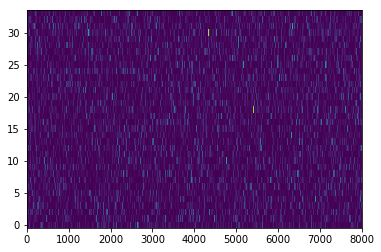

In [254]:
plt.imshow(psr.obs_signal,origin='left',aspect='auto')
plt.show()

In [255]:
sig=psr.obs_signal+0.1*psr.signal.signal[:]

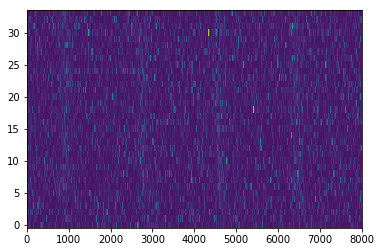

In [256]:
plt.imshow(sig,origin='left',aspect='auto')
plt.show()

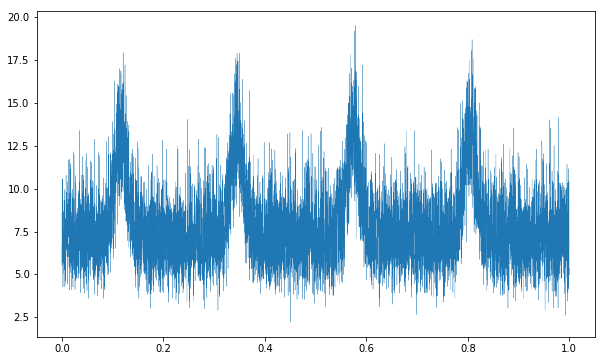

In [257]:
n=100
phase= np.linspace(0,1,sig.shape[1])
plt.figure(figsize=[10,6])
plt.plot(phase,np.sum(sig[:n,:],axis=0),lw=0.3)
plt.show()

1834


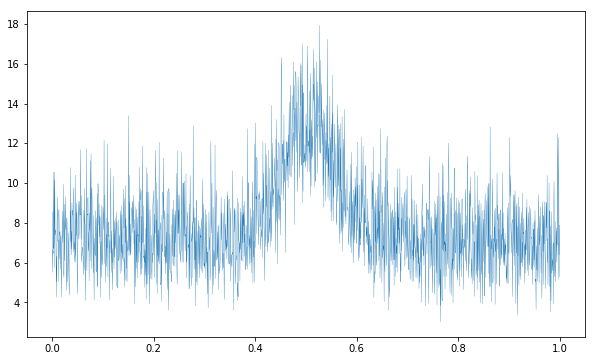

In [258]:
temp = sig[:,start_bin:stop_bin]
print(temp.shape[1])
n=100
phase= np.linspace(0,1,temp.shape[1])
plt.figure(figsize=[10,6])
plt.plot(phase,np.sum(temp[:n,:],axis=0),lw=0.3)
plt.show()

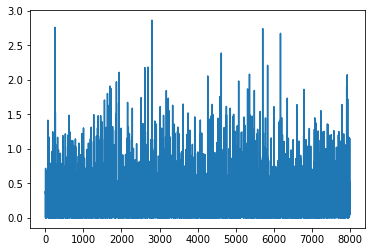

In [251]:
plt.plot(psr.obs_signal[10,:])
plt.show()